# Welcome to the Titanic Kaggle Challenge!


We will attempt to solve the challenge with various ML algorithms

In the first part we are following the tutorial from JLawman:
https://www.kaggle.com/jlawman/complete-beginner-your-first-titanic-submission


## Loading the Data

In [21]:
%load_ext autoreload
%autoreload 2

import tools.extract as ex
import pandas as pd

train, test = ex.load("data")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Understanding the data

In [2]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have 11 attributes for each person and an addition label whether the person has survived or not.

## Decision Tree

The decision tree takes the data as an input and the labels. We are using the DecisionTreeClassifier from the scikit-learn package:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


### Problem:
We have categorical data, meaning that we have attributes in forms of names, such as "male" or "female".

In [4]:
for df in [train,test]:
    df['Sex_binary']=df['Sex'].map({'male':1,'female':0})

# we might have to adjust this later

train['Age'] = train['Age'].fillna(0)
test['Age'] = test['Age'].fillna(0)

features = ['Pclass','Age','Sex_binary']
target = 'Survived'

train[features].head(3)

,Pclass,Age,Sex_binary
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0


## Train the tree

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(train[features], train[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predict

In [6]:
predictions = clf.predict(test[features])

predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

## Create Submission

In [7]:


#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

#Visualize the first 5 rows
submission.head()



,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [8]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'my_pred.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)


Saved file: my_pred.csv


## Next Steps:
For the next step, we should extract these functions into separate modules.

1. Extract
2. Transform
3. Predict

In [15]:

def encode_categories( df, column ):
    
    encoding = {}
    
    for idx, val in enumerate(df[column].unique()):
        encoding[val] = idx
        
    return df[column].map(encoding), encoding

In [1]:
import tools.extract as e
import tools.transform as t

train, test = e.load("data")

# 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
# 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

features = ['Pclass', 'Sex', 'Age']

def transform(data):
    selected = t.select(data, features)
    selected["Sex"], _ = ( t.encode_categories( selected, "Sex" ))
    selected["Age"] = t.set_NaN(selected, "Age", 0)
    return selected

import tools.classifiers.decision_tree as dt
import tools.predict as p

labels = train['Survived']

tree = dt.DecisionTree(features)
p.train(tree, transform(train), labels)
predictions = p.predict(tree, transform(test))

ID = "PassengerId"
LABEL = "Survived"

p.save( "00-getting-started.csv", [ID, LABEL], test[ID], predictions)

Saved file: 00-getting-started.csv


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Visualize

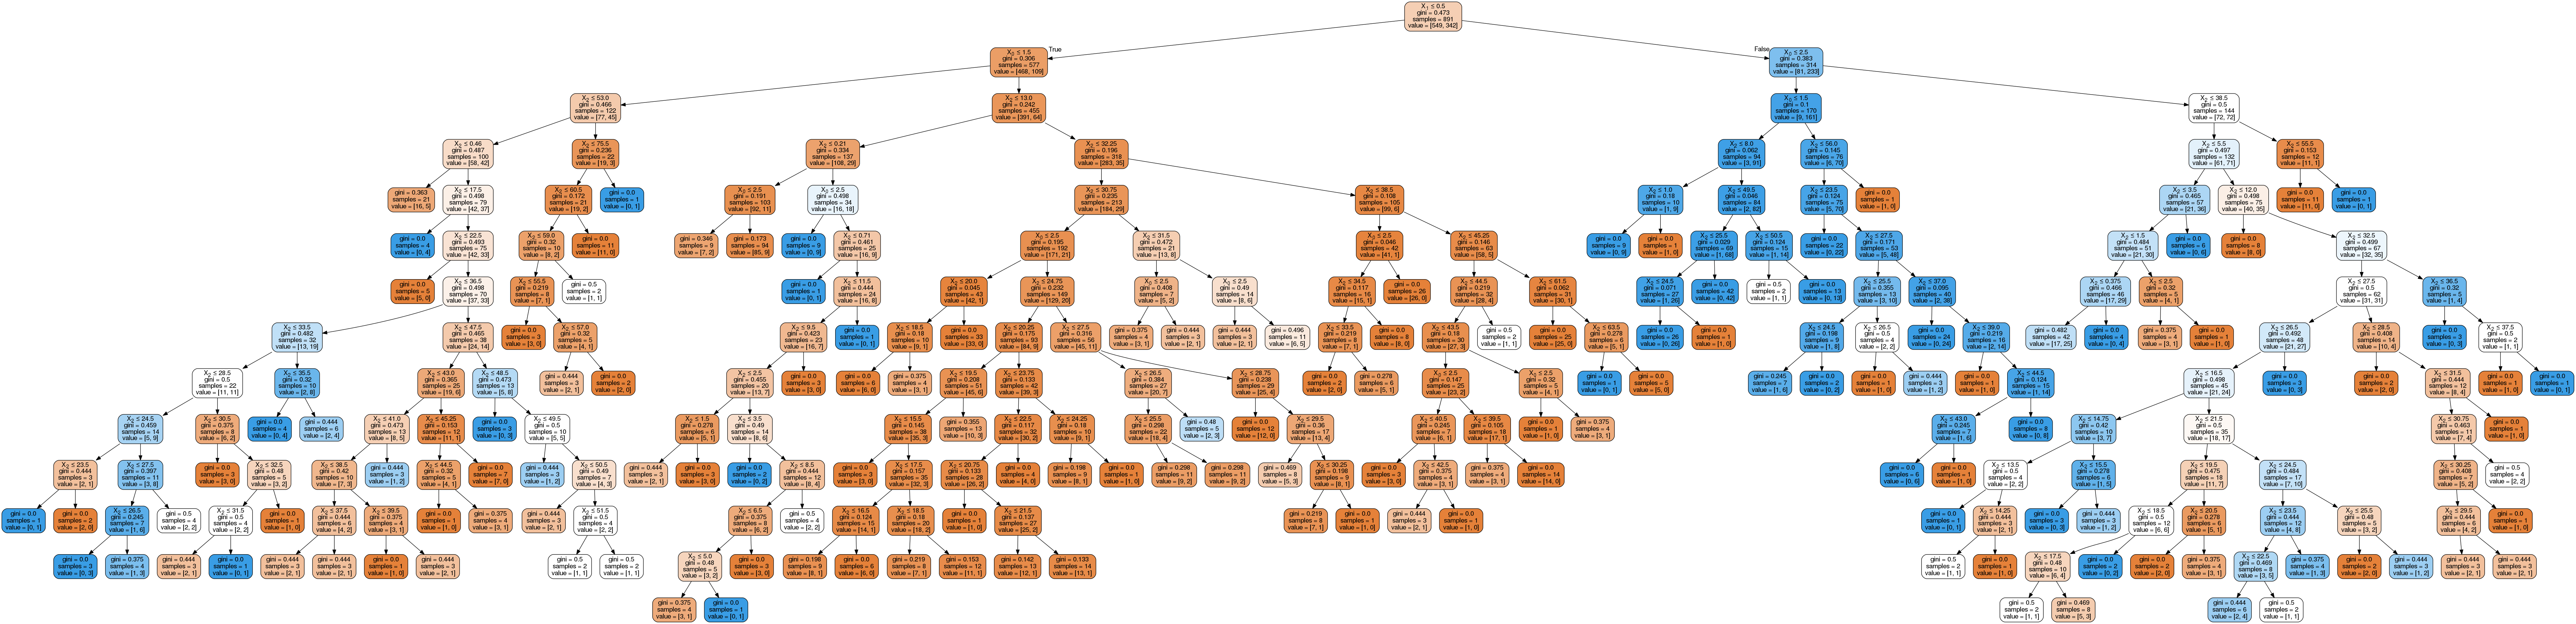

In [4]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(tree.model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Submission

After submitting it to Kaggle we get the following result:

![title](submission_results/00-score.png)

## Learnings

Since we allowed unlimited tree depth that might have caused our model to overfit! We will try to fix that in the next notebooks!